# EDA

In [102]:

import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


##### '''
Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€
'''

In [103]:
pd.pandas.set_option('display.max_columns',None)
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",sep=',',skiprows=1)


In [104]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [105]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [106]:
#Need to remove spaces from column names ie ='Classes  '
col=list(map(str.strip,[x for x in df.columns]))
df.columns=col

In [107]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [108]:
for i in col:
    print("col {} has".format(i),(df[i].isnull().sum()), "mssing values and around ", round((df[i].isnull().sum())/df[i].shape[0],3)," %")

col day has 1 mssing values and around  0.004  %
col month has 2 mssing values and around  0.008  %
col year has 2 mssing values and around  0.008  %
col Temperature has 2 mssing values and around  0.008  %
col RH has 2 mssing values and around  0.008  %
col Ws has 2 mssing values and around  0.008  %
col Rain has 2 mssing values and around  0.008  %
col FFMC has 2 mssing values and around  0.008  %
col DMC has 2 mssing values and around  0.008  %
col DC has 2 mssing values and around  0.008  %
col ISI has 2 mssing values and around  0.008  %
col BUI has 2 mssing values and around  0.008  %
col FWI has 2 mssing values and around  0.008  %
col Classes has 2 mssing values and around  0.008  %


In [109]:
#I got to know these are the only rows  that are missing so we can remove them
df[df['Temperature'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
#REMOVE IT 
df=df[~df['Temperature'].isnull()]
df=df[df['Temperature']!='Temperature']
df.shape

(244, 14)

In [111]:
#Analysis date features 

date_features=['day','month','year']
for i in date_features:
    print("The feaures {} has ".format(i),df[i].nunique(), "unique categories and values are ",df[i].unique() )

The feaures day has  31 unique categories and values are  ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31']
The feaures month has  4 unique categories and values are  ['6' '7' '8' '9']
The feaures year has  1 unique categories and values are  ['2012']


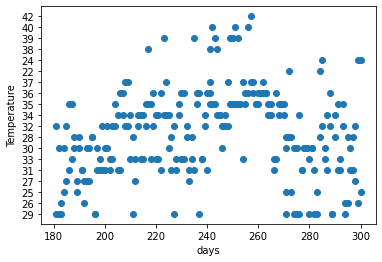

In [112]:
#for Regreesion probelm
data=df.copy()
data['day']=pd.to_numeric(data['day'])
data['month']=pd.to_numeric(data['month'])

data['days']=data['day']+30*data['month']

plt.scatter(data['days'],data['Temperature'])
plt.xlabel('days')
plt.ylabel('Temperature')
plt.show()

In [113]:
data['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

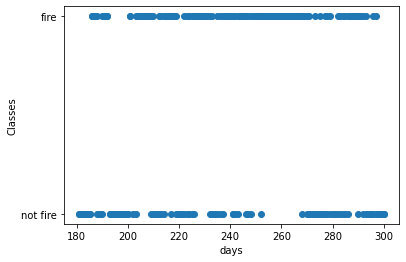

In [114]:
#for classification probelm
data=df.copy()

data['day']=pd.to_numeric(data['day'])
data['month']=pd.to_numeric(data['month'])

data['days']=data['day']+30*data['month']
data['Classes']=data['Classes'].apply(lambda x : str(x).strip())

plt.scatter(data['days'],data['Classes'])
plt.xlabel('days')
plt.ylabel('Classes')
plt.show()


In [115]:
#so we can remove year features because it has only one value and trasform month and day in one
#feature in "feature engineering section"




In [116]:
# Find out all numeric features

num_features=[x for x in df.columns if x not in ['day','month','year','Classes']]
df[num_features]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
242,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5
243,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0
244,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
245,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [117]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<15 ]
print("Discrete Variables Count: {}".format(len(discrete_features)))

Discrete Variables Count: 0


In [118]:
#so here we can make conclusion all the numeric features are continous in nature because we dont have any discrete features
# num_features=cont_features+discrete_features
cont_features=num_features

In [119]:
df.shape

(244, 14)

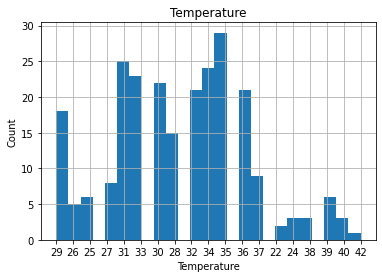

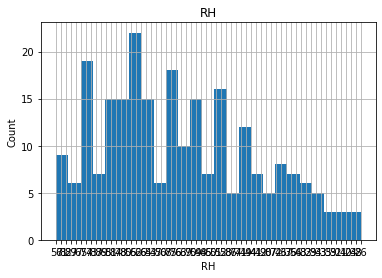

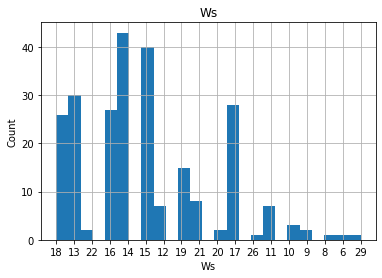

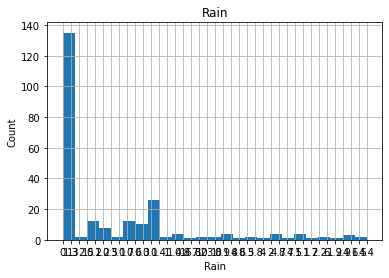

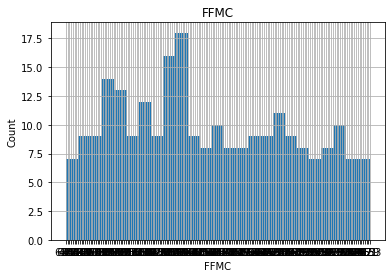

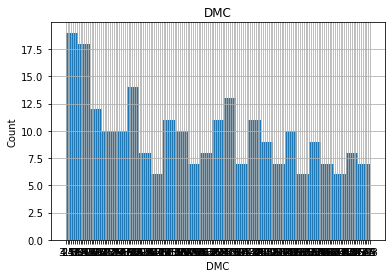

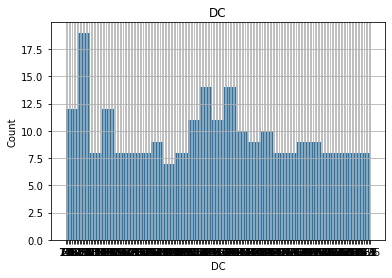

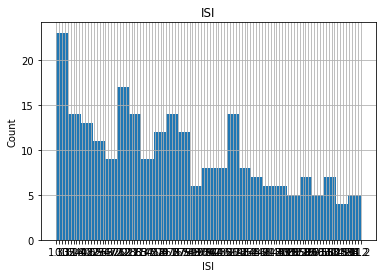

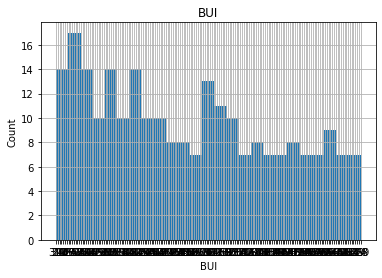

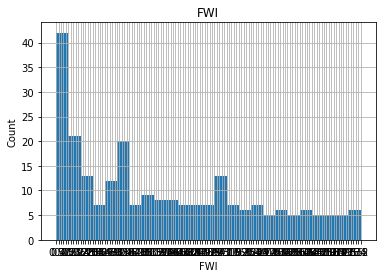

In [120]:
#Analize the contious feature distribution

for feature in cont_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [121]:
#so I observed all fetaures follow Gaussion Normal Distrution that woould be good for ML model.
# there are 2 features rain and FWI that is right skewed distribution

In [122]:
# lets tranform logrithmic and alayzie the destribution
data=df.copy()
for feature in cont_features:
    data[feature]=pd.to_numeric(data[feature])
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
    
    

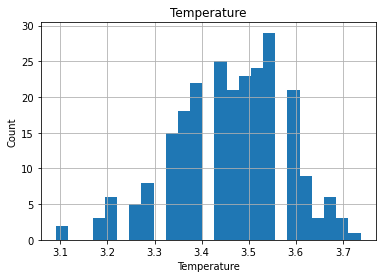

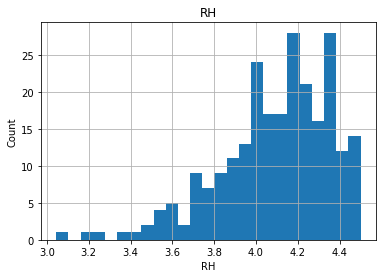

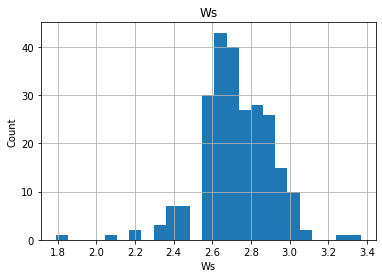

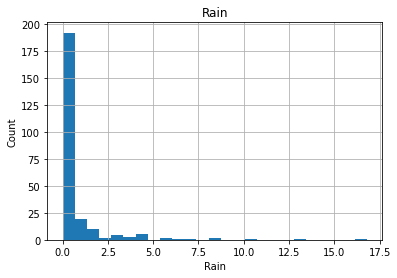

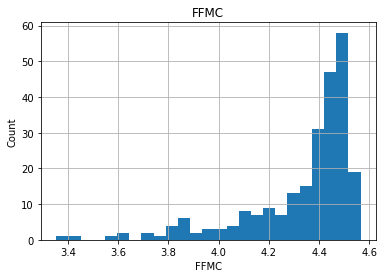

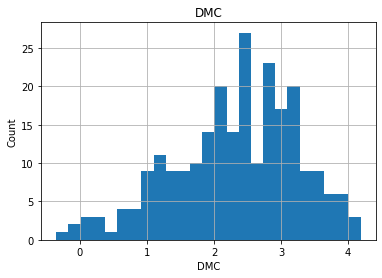

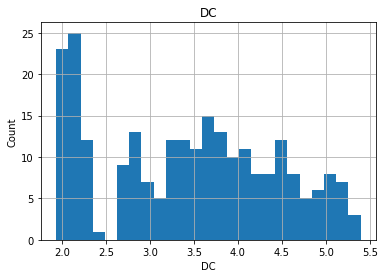

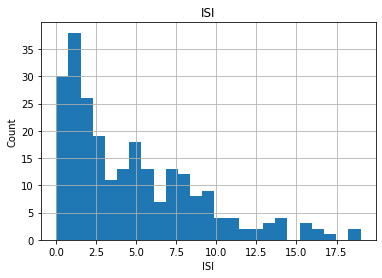

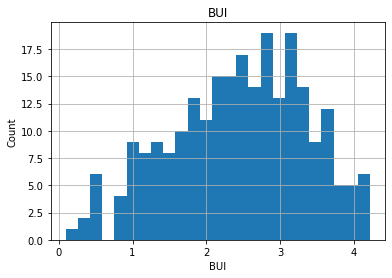

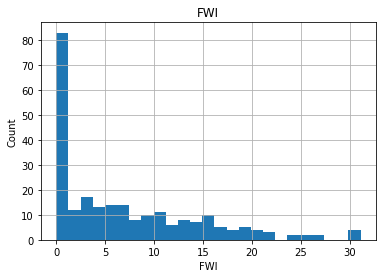

In [123]:
for feature in cont_features:
    
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [124]:
#so I observed after transfomation all fetures follow normal distrubtion excpt rain and FWI
# because these features have 0 value present in that beucause of that log tranformin was not happend. so we can go 
# with the orginal features value without log transformation.

In [125]:
#Check variance of continuous features
data=df.copy()
for feature in cont_features:
    data[feature]=pd.to_numeric(data[feature])
    print("the variance of df {} is ".format(feature),statistics.variance(data[feature]))
      

the variance of df Temperature is  13.20481683869662
the variance of df RH is  221.53941509815826
the variance of df Ws is  7.897102475882075
the variance of df Rain is  3.9976226135060378
the variance of df FFMC is  205.56593874384401
the variance of df DMC is  152.9683820751535
the variance of df DC is  2267.6322449908926
the variance of df ISI is  17.260931660257707
the variance of df BUI is  201.68681828914524
the variance of df FWI is  55.180616609323344


In [126]:
# I observed the varaiance is too high for DC,BUI,FFMC  so we need to scale down values using standardization


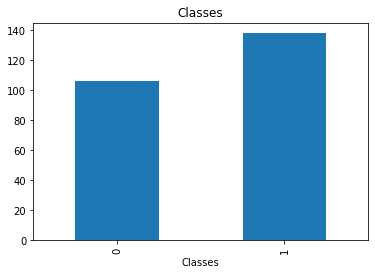

In [127]:
# Checking if we have Classes have out put feature ,then just check balance/imblanced of data  for classification probelems

data=df.copy()
data['Classes']=data['Classes'].apply(lambda x : str(x).strip())
data['Classes']=data['Classes'].map({"not fire":0,"fire":1})
data.groupby(['Classes'])['Classes'].count().plot.bar()
plt.title('Classes')
plt.show()


In [128]:
#conclusion it seems to be balanced data

In [129]:
#check multi collinearity

df[num_features].corr()

""


In [130]:
df[cont_features]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
242,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5
243,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0
244,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
245,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


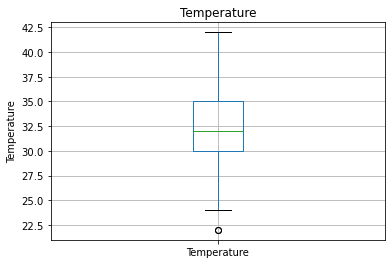

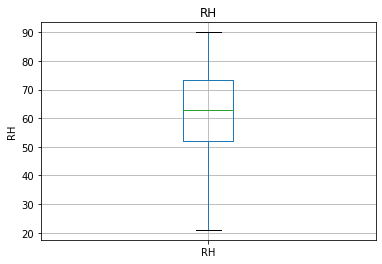

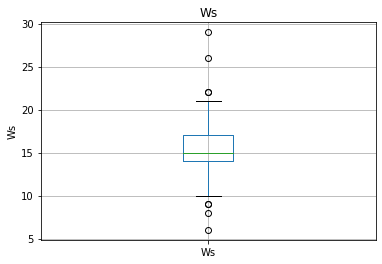

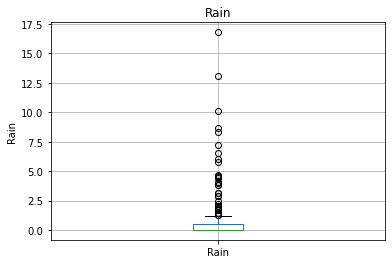

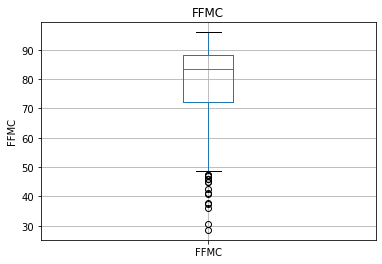

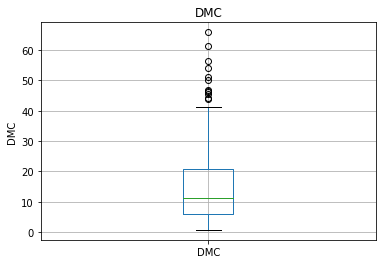

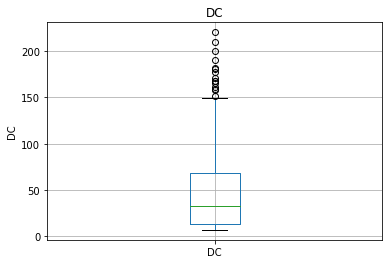

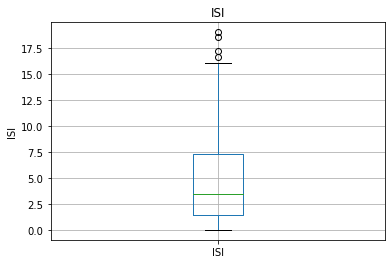

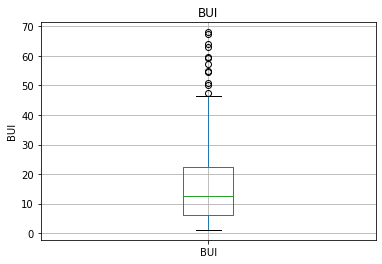

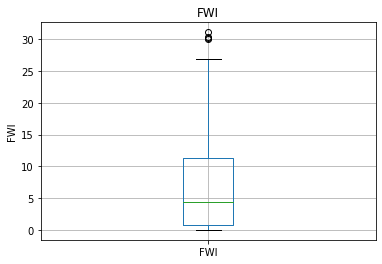

In [131]:
#checking Outliers

data=df.copy()
for feature in cont_features:
    data[feature]=pd.to_numeric(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

## Feature engineering

In [132]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [133]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [134]:
# Date feature transformation and remove un neccessary columns
df['day']=pd.to_numeric(df['day'])
df['month']=pd.to_numeric(df['month'])
df['days']=df['day']+30*df['month']

df=df.drop(['day', 'month','year'], axis = 1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,days
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,181
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,182
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,183
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,184
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,185


In [135]:
#Update "Classes" feature first by removing extra spaces then encode nominally 

df['Classes']=df['Classes'].apply(lambda x : str(x).strip())
df['Classes']=df['Classes'].map({"not fire":0,"fire":1})
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,days
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,181
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,182
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,183
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,184
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,185


In [136]:
#There were twop rows having missing values that was removed in EDA part
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
days           0
dtype: int64

In [137]:
# convert all features into numeric 
for i in  df.columns:
    df[i]=pd.to_numeric(df[i])

In [138]:
df.head().to_csv("Test1.csv")


### Sepatare dependent and independent features for Regression Probelm "Temperature" is output feature

In [139]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0:1]

In [140]:
X.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,days
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,181
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,182
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,183
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,184
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,185


### Splitting the dataset into the Training set and Test set

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Feature Scalling

In [142]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Linear Regression

In [143]:
from sklearn.linear_model import LinearRegression
ln_regressor=LinearRegression()
ln_regressor.fit(X_train,y_train)

LinearRegression()

In [144]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(ln_regressor,X_train,y_train,cv=5)

In [145]:
y_pred=ln_regressor.predict(X_test)

In [146]:
y_test.dtypes

Temperature    int64
dtype: object

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

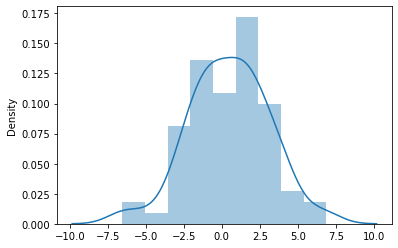

In [147]:
sns.distplot(y_test-y_pred)

In [148]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5336691441023329

In [149]:
import pickle
# open a file, where you ant to store the data
#file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(ln_regressor, open('regression_model.pkl', 'wb'))

### Ridge Regreesion

In [150]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [151]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [152]:
y_pred=ridge_regressor.predict(X_test)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

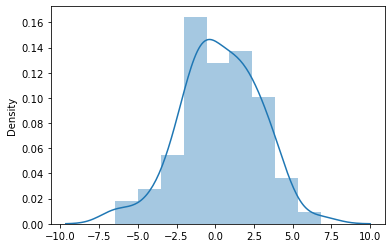

In [153]:
sns.distplot(y_test-y_pred)

In [154]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5751578070062268

### Lasso Regression

In [155]:
from sklearn.linear_model import Lasso

In [156]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369.5503835290322, tolerance: 0.17459926470588238
  model = cd_fast.enet_coordinate_descent(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 386.7086437973886, tolerance: 0.1675816176470588
  model = cd_fast.enet_coordinate_descent(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.9513097687122, tolerance: 0.16378161764705884
  model = cd_fast.enet_coordinate_descent(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

{'alpha': 0.01}
-6.394885881039


In [157]:
y_pred=lasso_regressor.predict(X_test)

In [158]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5865879897384456

### SVR

In [159]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [160]:
sv_regressor = SVR()

In [161]:
## Hyper Parameter Optimization

params={
 "kernel"    : ["linear", "poly", "rbf", "sigmoid"] ,
 "degree"        : [ 1,2,3, 4, 5, 6],
 "gamma" : ["scale","auto"]
    }
print(params)

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 2, 3, 4, 5, 6], 'gamma': ['scale', 'auto']}


In [162]:
random_search=GridSearchCV(sv_regressor,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)

In [163]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=3)

In [164]:
random_search.best_params_

{'degree': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}

In [165]:
random_search.best_score_

-6.141904869759986

In [166]:
y_pred=random_search.predict(X_test)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

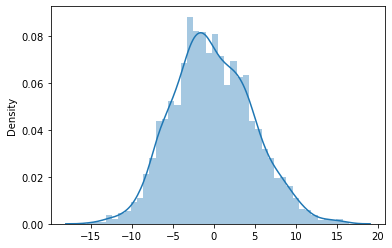

In [167]:
sns.distplot(y_pred-y_test.to_numpy())

In [168]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.43071081681273937

### Decesion Tree Regressor

In [169]:
from sklearn.tree import DecisionTreeRegressor

In [170]:
dtree=DecisionTreeRegressor()


In [171]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [172]:
## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [173]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [174]:
random_search.fit(X_train,y_train)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [175]:
random_search.best_params_

{'max_depth': 3,
 'max_features': 'log2',
 'max_leaf_nodes': 70,
 'min_samples_leaf': 3,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [176]:
random_search.best_score_

-6.371178071564152

In [177]:
y_pred=random_search.predict(X_test)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

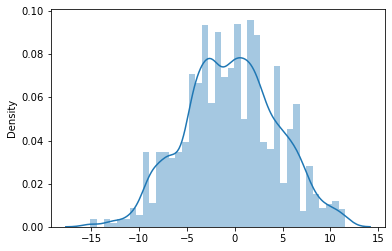

In [178]:
sns.distplot(y_pred-y_test.to_numpy())

In [179]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5365599393910909

In [180]:
r2_score(y_train,random_search.predict(X_train))

0.5286052579681237

### Random Forest

In [181]:
from sklearn.ensemble import RandomForestRegressor

In [182]:
rf_regressor=RandomForestRegressor()
rf_regressor.fit(X_train,y_train)

C:\Users\dell\AppData\Local\Temp/ipykernel_6100/2388832563.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train,y_train)


RandomForestRegressor()

In [183]:
print(" R^2 <-- on train set: {}".format(rf_regressor.score(X_train, y_train)))

 R^2 <-- on train set: 0.9537385846911709


In [184]:
print(" R^2 <-- on train set: {}".format(rf_regressor.score(X_test, y_test)))

 R^2 <-- on train set: 0.7177077006454156


In [185]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf_regressor,X,y,cv=5)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was pa

In [186]:
RandomForestRegressor()

RandomForestRegressor()

In [191]:
from sklearn.model_selection import RandomizedSearchCV

In [192]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [193]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [194]:
rf = RandomForestRegressor()

In [195]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [196]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200; total time=   0.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   1.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   1.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   1.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   1.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   1.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   1.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100; total time=   0.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   2.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   2.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   2.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   2.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   2.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   2.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   2.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   2.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   2.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200; total time=   2.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200; total time=   2.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200; total time=   2.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200; total time=   2.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200; total time=   2.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   1.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   2.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   1.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   2.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   2.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   2.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   2.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   2.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   1.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   3.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   2.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   3.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   3.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   3.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   3.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100; total time=   2.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100; total time=   3.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100; total time=   2.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100; total time=   3.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100; total time=   3.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   1.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=700; total time=   1.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   0.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   0.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   1.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   1.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   1.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   1.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   1.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=900; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=900; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=900; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=900; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=900; total time=   2.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   3.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   2.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   2.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   2.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   3.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   1.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   1.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=   1.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   2.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   1.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   2.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   1.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   1.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   1.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   1.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   1.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800; total time=   1.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800; total time=   1.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800; total time=   1.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800; total time=   1.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800; total time=   1.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1200; total time=   2.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1200; total time=   2.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1200; total time=   2.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1200; total time=   2.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1200; total time=   3.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   1.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=200; total time=   0.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=200; total time=   0.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=200; total time=   0.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=200; total time=   0.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=200; total time=   0.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   1.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   1.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   2.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   2.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   2.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   2.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   2.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   1.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   2.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   1.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   1.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   1.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=   2.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=   2.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=   2.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=   2.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=   3.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   2.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   2.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   2.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   2.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   2.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   2.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   1.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   1.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   1.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200; total time=   2.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200; total time=   2.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200; total time=   2.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200; total time=   2.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200; total time=   2.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   1.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   1.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   1.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   1.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   1.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   2.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   2.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   1.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   1.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   1.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   1.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   1.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   3.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=   1.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=   1.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=   1.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   2.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   2.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   2.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   2.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=900; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=900; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=900; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=900; total time=   2.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=900; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1100; total time=   2.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1100; total time=   2.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1100; total time=   2.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1100; total time=   2.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1100; total time=   2.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   3.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   3.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=   1.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=   1.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=   0.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=   1.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=500; total time=   1.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   3.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   3.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   3.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   3.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900; total time=   1.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900; total time=   1.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900; total time=   1.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900; total time=   1.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=900; total time=   1.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200; total time=   0.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=200; total time=   0.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=700; total time=   1.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=700; total time=   1.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=700; total time=   1.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=700; total time=   1.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=700; total time=   1.6s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=   2.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=   2.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=   2.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=   2.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=   2.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   2.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   2.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   3.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   2.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   3.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   2.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   2.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   2.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   2.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   2.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.1s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.2s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.5s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.3s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.4s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   1.9s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   1.7s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   1.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   2.0s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   1.8s


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [197]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [198]:
y_pred=rf_random.predict(X_test)

In [199]:
y_pred

array([32.7104026 , 33.21907125, 34.95837897, 29.37350397, 30.12864881,
       25.566125  , 34.17589466, 34.97298611, 32.43874802, 34.64069823,
       34.05368452, 29.89998629, 34.85841973, 36.55876768, 29.98691071,
       29.81481746, 32.48519264, 32.73447817, 28.56519462, 32.17873413,
       34.39098611, 25.84903986, 29.90899008, 28.93574062, 36.90850776,
       33.46745826, 30.62928968, 31.34808405, 30.91973882, 32.37609707,
       33.67512698, 27.56894102, 28.28127994, 31.34118452, 29.65059127,
       35.64391613, 31.58004419, 29.48552976, 34.47572619, 29.93935101,
       29.31934325, 30.64450992, 33.68910317, 34.15965244, 34.6676627 ,
       32.1472812 , 31.75509127, 27.23908929, 34.53708333, 30.5997426 ,
       35.83553499, 32.69668236, 25.28185967, 34.61190634, 31.71688979,
       28.93105952, 27.60593308, 31.46285804, 29.7504053 , 33.64419841,
       28.87120238, 34.8439715 , 33.76970757, 34.75467244, 30.66396627,
       33.45038416, 35.0706526 , 31.07425   , 27.16178193, 30.95

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

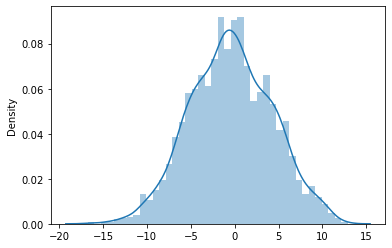

In [200]:
sns.distplot(y_pred-y_test.to_numpy())

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

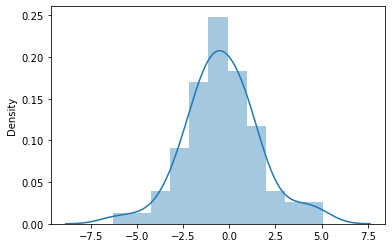

In [201]:
sns.distplot(y_pred-y_test.to_numpy().flatten(order='C'))

In [202]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7206433993095557

In [203]:
#y_test.to_numpy().flatten(order='C')
from sklearn.metrics import r2_score
r2_score(y_test.to_numpy().flatten(order='C'), y_pred)

0.7206433993095557

In [204]:
!pip install xgboost

In [205]:
import xgboost as xgb
xb_regressor=xgb.XGBRegressor()

In [206]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]


In [207]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [208]:
xg_random = RandomizedSearchCV(estimator = xb_regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [209]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   2.6s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   2.3s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   2.2s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   2.3s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   2.7s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   1.3s
[CV] END learning_ra

[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   2.3s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   2.1s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   2.1s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.6s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.6s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.6s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.6s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.5s
[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=600, subsa

[CV] END learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1200, subsample=0.7; total time=   2.3s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsampl

[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.6s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.5s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.6s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.5s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   2.4s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   2.3s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   2.2s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   2.4s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1

[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.6s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.6s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, sub

[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   1.6s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   1.6s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   1.6s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsampl

[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          predictor=None, random_state=None,
                             

In [210]:
xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 1100,
 'min_child_weight': 4,
 'max_depth': 10,
 'learning_rate': '0.1'}

In [211]:
y_pred=xg_random.predict(X_test)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

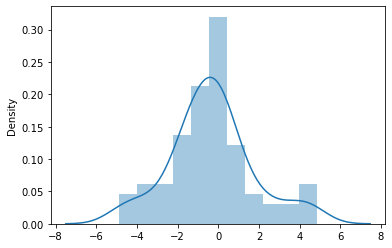

In [212]:
sns.distplot(y_pred-y_test.to_numpy().flatten(order='C'))

In [213]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7121451819051263

# Creating Classication Model

In [214]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,days
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,181
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,182
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,183
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,184
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,185


In [215]:
X=df[[x for x in df.columns if x !='Classes']]
y=df['Classes']

In [216]:
X


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,days
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,181
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,182
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,183
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,184
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,185
...,...,...,...,...,...,...,...,...,...,...,...
242,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,296
243,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,297
244,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,298
245,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,299


In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Logistic Regrerssion

In [218]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression()

In [219]:
from sklearn.model_selection import GridSearchCV

parameter={'C':[0.5,1,2,3,5,6,7,9,10,30,45],'penalty':['l1','l2','elasticnet']}
log_regressor=GridSearchCV(regression,parameter,scoring='accuracy',cv=5)

log_regressor.fit(X_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_valida

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 5, 6, 7, 9, 10, 30, 45],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [220]:
print(log_regressor.best_params_)

{'C': 0.5, 'penalty': 'l2'}


In [221]:
print(log_regressor.best_score_)

0.9588235294117646


In [222]:
y_pred=log_regressor.predict(X_test)

In [223]:
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [224]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
confusion_matrix(y_test,y_pred)

array([[33,  1],
       [ 2, 38]], dtype=int64)

In [225]:
f1_score(y_test,y_pred)

0.9620253164556962

### KNN Classification

In [226]:
from sklearn.neighbors import KNeighborsClassifier

In [227]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [228]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

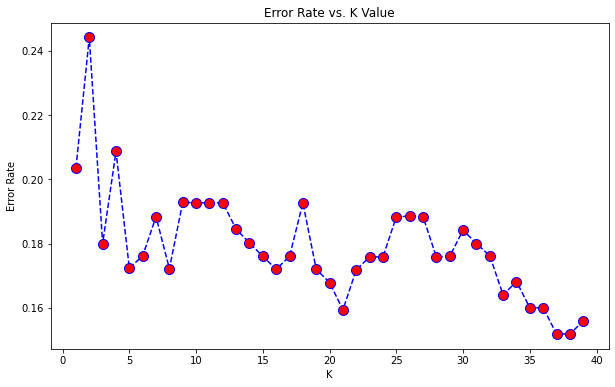

In [229]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
        # markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [230]:
# NOW WITH K=21
knn = KNeighborsClassifier(n_neighbors=21)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[31  3]
 [11 29]]


              precision    recall  f1-score   support

           0       0.74      0.91      0.82        34
           1       0.91      0.72      0.81        40

    accuracy                           0.81        74
   macro avg       0.82      0.82      0.81        74
weighted avg       0.83      0.81      0.81        74



### Support vector classification

In [231]:
X=df[[x for x in df.columns if x !='Classes']].values
y=df['Classes'].values

In [232]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [233]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [234]:
## Hyper Parameter Optimization

params={
 "kernel"    : ["linear", "poly", "rbf", "sigmoid"] ,
 "degree"        : [ 1,2,3, 4, 5, 6],
 "gamma" : ["scale","auto"]
    }
print(params)

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 2, 3, 4, 5, 6], 'gamma': ['scale', 'auto']}


In [235]:
from sklearn.svm import SVC
sv_classifier = SVC()

In [236]:
random_search=GridSearchCV(sv_classifier,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [237]:

random_search.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=3)

In [238]:
y_pred = random_search.predict(X_test)

In [239]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[32  2]
 [ 5 35]]


0.9054054054054054

### NBB Classification

In [240]:
X=df[[x for x in df.columns if x !='Classes']]
y=df['Classes']

In [241]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [242]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [243]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [244]:
y_pred = nb_classifier.predict(X_test)

In [245]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[32  2]
 [ 2 38]]


0.9459459459459459

### Decesion Tree classifier

In [246]:
X=df[[x for x in df.columns if x !='Classes']]
y=df['Classes']

In [247]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [248]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()


In [249]:
## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}
random_search=GridSearchCV(dt_classifier,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)
random_search.fit(X_train,y_train)
random_search.best_params_
y_pred=random_search.predict(X_test)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


In [250]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[33  1]
 [ 9 31]]


0.8648648648648649

### Random forest Classifier

In [251]:
X=df[[x for x in df.columns if x !='Classes']]
y=df['Classes']

In [252]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [253]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rf_random = RandomizedSearchCV(estimator = rf_classifier, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)
rf_random.best_params_
y_pred=rf_random.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_featu

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   1.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=15, max_feature

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.7s
[CV] END max_depth=10, max_

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.4s
[CV] END max_depth=30,

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_fe

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   2.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   2.5s


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
pickle.dump(rf_random, open('model.pkl', 'wb'))